學習指南:
---
1. Continuous Probability 
2. Probability density function(PDF)
3. Normal PDF
4. Normal CDF
5. The difference between thereotical & raw data
6. Histogram 
7. ECDF
8. Poisson distribution

## Reference:
1. [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)
2. [numpy.random.exponential() in Python](https://www.geeksforgeeks.org/numpy-random-exponential-in-python/)

## Continuous Probability
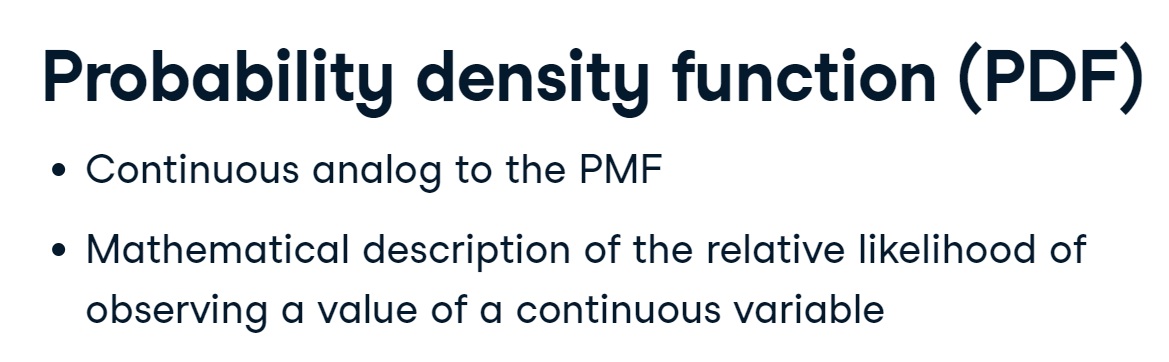

## Normal PDF
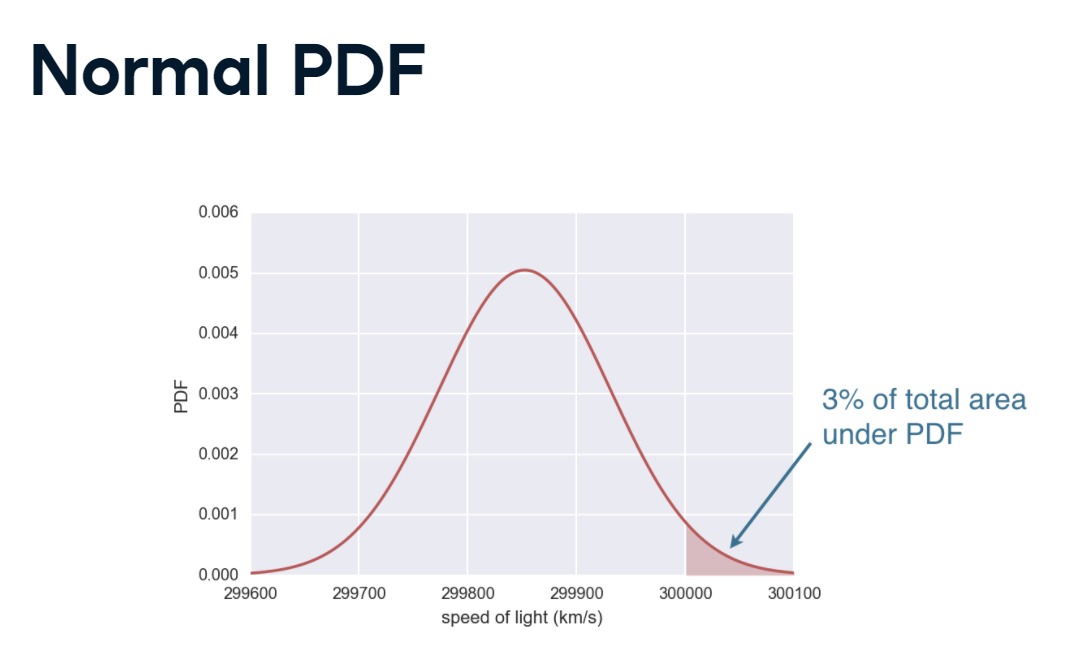

## Normal CDF
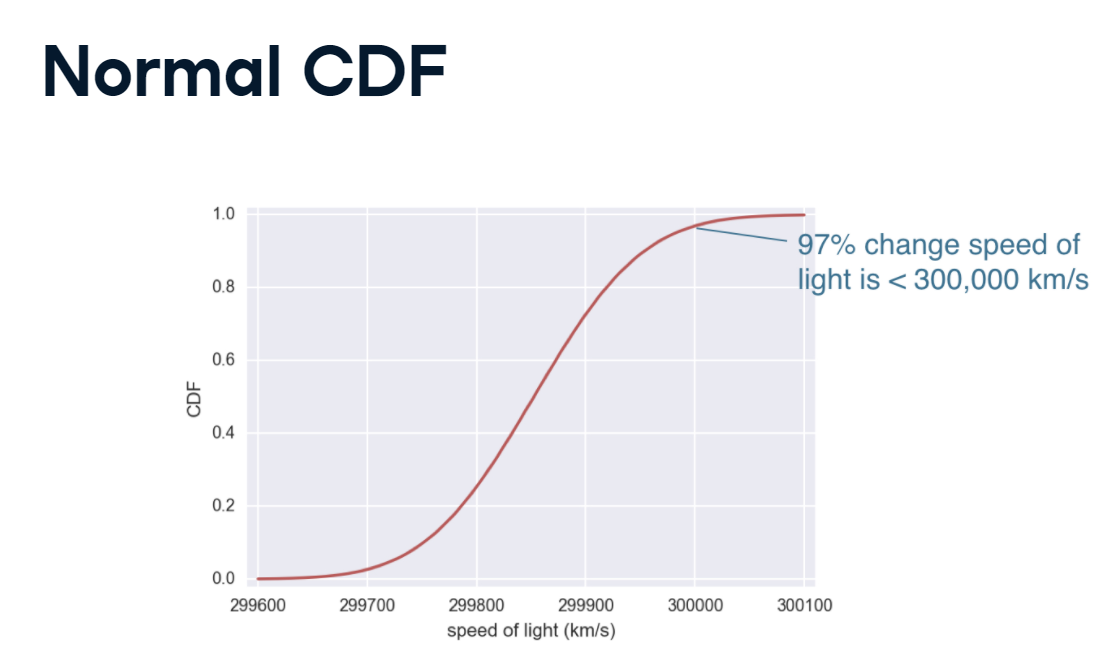


## The impotant fact from the moormal distrivution and Raw data 
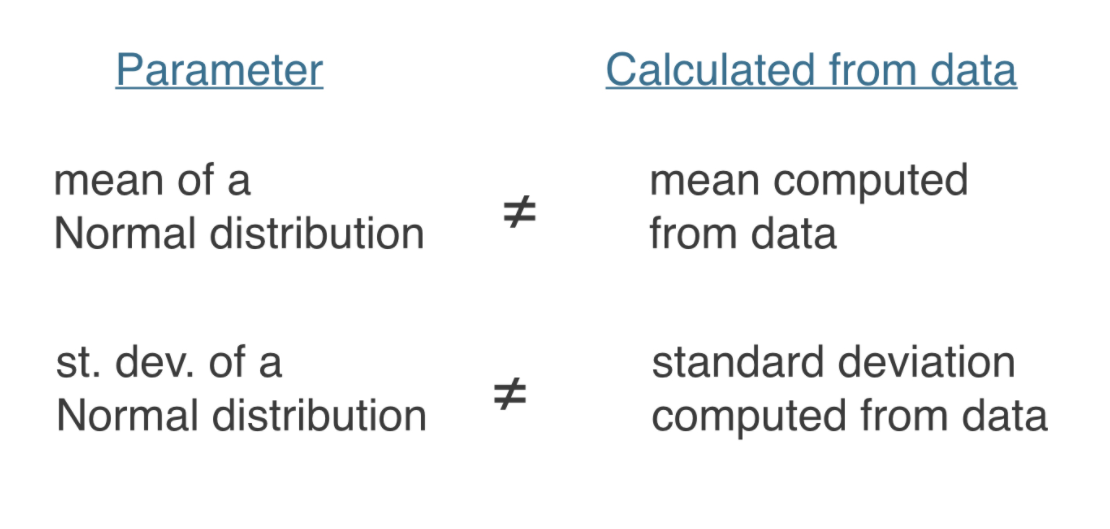


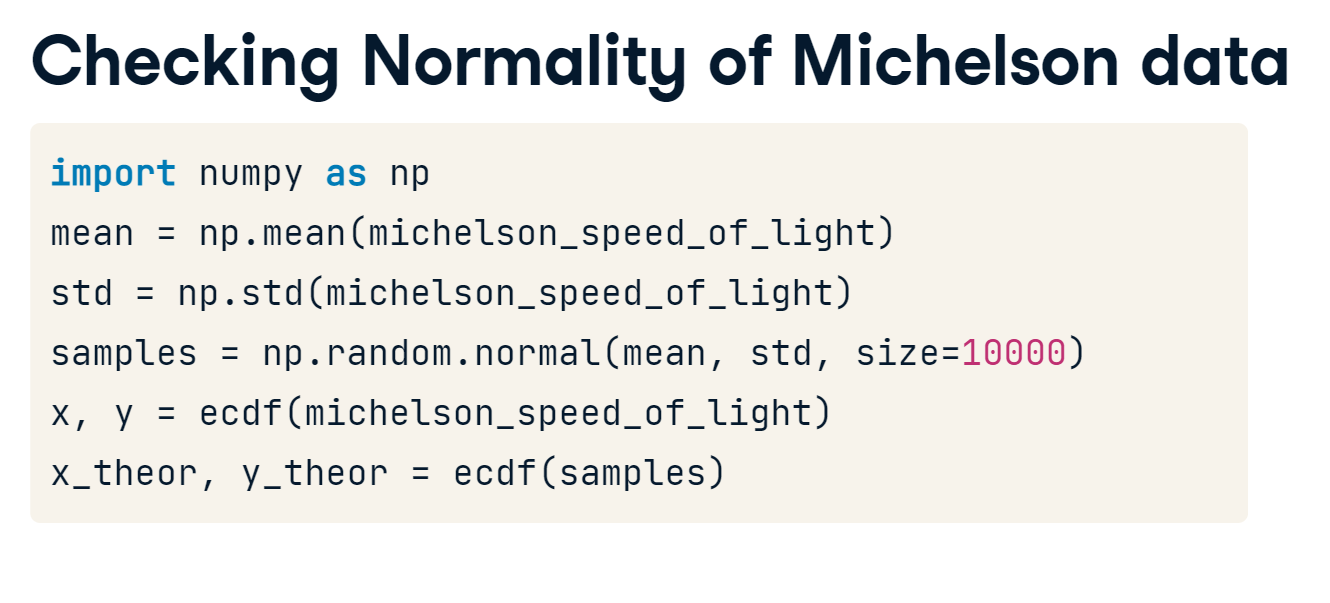

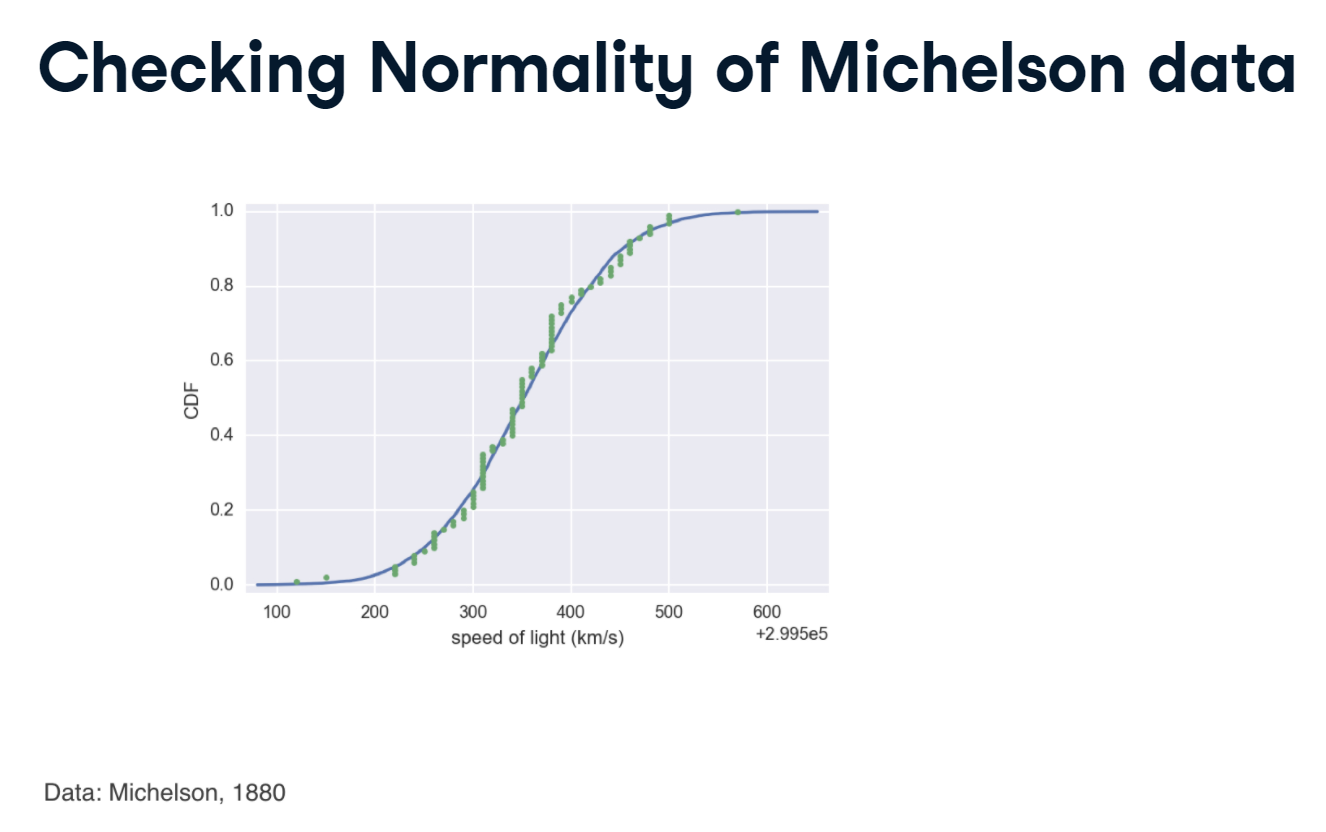

## **The Normal PDF**
In this exercise, you will explore the Normal PDF and also learn a way to plot a PDF of a known distribution using hacker statistics. Specifically, you will plot a Normal PDF for various values of the variance.

* Draw 100,000 samples from a Normal distribution that has a mean of 20 and a standard deviation of 1. Do the same for Normal distributions with standard deviations of 3 and 10, each still with a mean of 20. Assign the results to samples_std1, samples_std3 and samples_std10, respectively.
* Plot a histograms of each of the samples; for each, use 100 bins, also using the keyword arguments density=True and histtype='step'. The latter keyword argument makes the plot look much like the smooth theoretical PDF. You will need to make 3 plt.hist() calls.
* Hit 'Submit Answer' to make a legend, showing which standard deviations you used, and show your plot! There is no need to label the axes because we have not defined what is being described by the Normal distribution; we are just looking at shapes of PDFs.

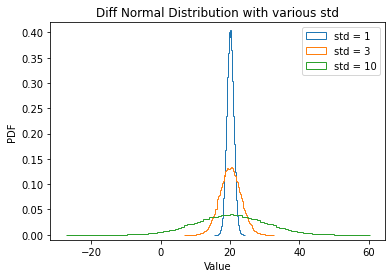

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 

# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size = 100000)
samples_std3 = np.random.normal(20, 3, size = 100000)
samples_std10 = np.random.normal(20, 10, size = 100000)

# Make histograms
_ = plt.hist(samples_std1, density = True, histtype = 'step', bins = 100)
_ = plt.hist(samples_std3, density = True, histtype = 'step', bins = 100)
_ = plt.hist(samples_std10, density = True, histtype = 'step', bins = 100)

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))

_ = plt.xlabel('Value')
_ = plt.ylabel('PDF')
_ = plt.title('Diff Normal Distribution with various std')
plt.ylim(-0.01, 0.42)
plt.show()

## **The Normal CDF**
Now that you have a feel for how the Normal PDF looks, let's consider its CDF. Using the samples you generated in the last exercise (in your namespace as samples_std1, samples_std3, and samples_std10), generate and plot the CDFs.

* Use your ecdf() function to generate x and y values for CDFs: x_std1, y_std1, x_std3, y_std3 and x_std10, y_std10, respectively.
* Plot all three CDFs as dots (do not forget the marker and linestyle keyword arguments!).
* Hit submit to make a legend, showing which standard deviations you used, and to show your plot. There is no need to label the axes because we have not defined what is being described by the Normal distribution; we are just looking at shapes of CDFs.

In [9]:
import numpy as np 
import matplotlib.pyplot as plt

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1)/n
    return x, y

    # x, y = ecdf(data)
    # print(x, y)

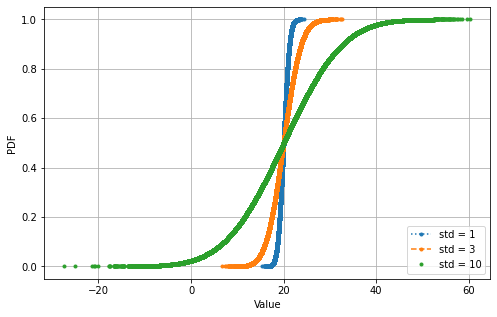

In [22]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Change the size of figure
plt.figure(figsize=(8, 5))

# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker = '.', linestyle = 'dotted')
_ = plt.plot(x_std3, y_std3, marker = '.', linestyle = 'dashed')
_ = plt.plot(x_std10, y_std10, marker = '.', linestyle = 'none')

# Plot legend & labels 
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
_ = plt.xlabel('Value')
_ = plt.ylabel('PDF')
_ = plt.grid()

plt.show()

## **Are the Belmont Stakes results Normally distributed?**
Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, compute the mean and standard deviation of the Belmont winners' times. Sample out of a Normal distribution with this mean and standard deviation using the np.random.normal() function and plot a CDF. Overlay the ECDF from the winning Belmont times. Are these close to Normally distributed?

Note: Justin scraped the data concerning the Belmont Stakes from the Belmont Wikipedia page.

* Compute mean and standard deviation of Belmont winners' times with the two outliers removed. The NumPy array belmont_no_outliers has these data.
* Take 10,000 samples out of a normal distribution with this mean and standard deviation using np.random.normal().
* Compute the CDF of the theoretical samples and the ECDF of the Belmont winners' data, assigning the results to x_theor, y_theor and x, y, respectively.
* Hit submit to plot the CDF of your samples with the ECDF, label your axes and show the plot.

In [23]:
import numpy as np
import matplotlib.pyplot as plt 

# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size = 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor, marker = '.', linestyle = 'none')
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
_ = plt.legend(('Theory', 'Exp'), loc='lower right')
plt.show()

NameError: name 'belmont_no_outliers' is not defined

## **If you have a story, you can simulate it!**
Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! You can always simulate it. We'll do that in this and the next exercise.

In earlier exercises, we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle, when a batter gets all four kinds of hits in a single game, is another rare baseball event. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

How long must we wait to see a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes in succession? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

Now, you will write a function to sample out of the distribution described by this story.

* Define a function with call signature successive_poisson(tau1, tau2, size=1) that samples the waiting time for a no-hitter and a hit of the cycle.
* Draw waiting times tau1 (size number of samples) for the no-hitter out of an exponential distribution and assign to t1.
* Draw waiting times tau2 (size number of samples) for hitting the cycle out of an exponential distribution and assign to t2.
* The function returns the sum of the waiting times for the two events.

In [25]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size = size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size = size)

    return t1 + t2

## **Distribution of no-hitters and cycles**
Now, you'll use your sampling function to compute the waiting time to observe a no-hitter and hitting of the cycle. The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

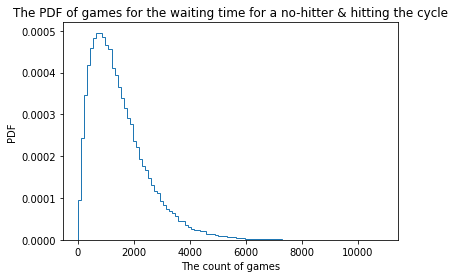

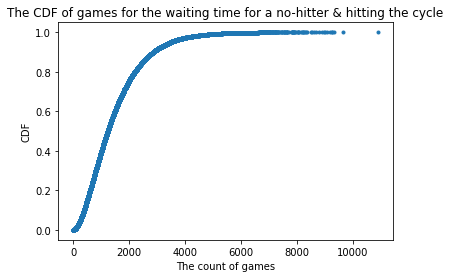

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(tau1 = 764, tau2 = 715, size = 100000)

# Make the histogram
_ = plt.hist(waiting_times, density = True, bins = 100, histtype = 'step')

# Label axes
_ = plt.xlabel('The count of games')
_ = plt.ylabel('PDF')
_ = plt.title('The PDF of games for the waiting time for a no-hitter & hitting the cycle')

# Show the plot
plt.show()

# Plot CDF histogram
x, y = ecdf(waiting_times)
_ = plt.xlabel('The count of games')
_ = plt.ylabel('CDF')
_ = plt.title('The CDF of games for the waiting time for a no-hitter & hitting the cycle')
_ = plt.plot(x, y, marker = '.', linestyle = 'none')

# Show the plot
plt.show()